In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# auto-reload extnesion reloads imported modules if they are updated.

import matplotlib.pyplot as plt
import numpy as np
import ReconstructOrder.utils.plotting as pltOrder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## test 1: lines are properly centered

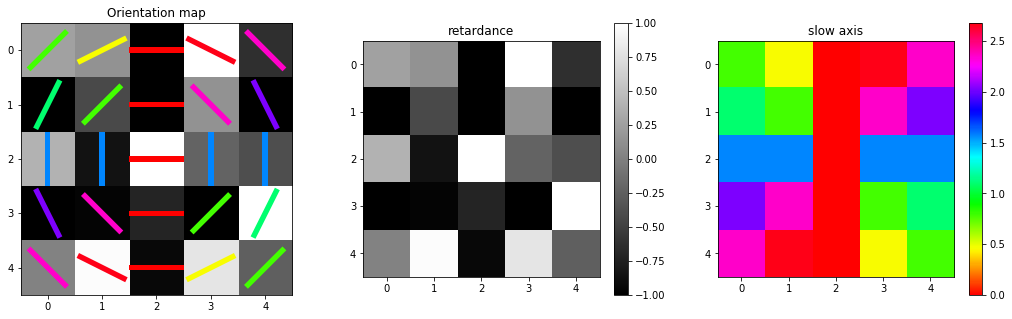

In [6]:
# small coordinate grid so that pixels can be visualized
x = np.linspace(-1.5,1.5,5)
xx, yy = np.meshgrid(x,x)

# random retardance, orientation rotates azimuthally.
retardance = np.random.randn(*xx.shape)
orientation = np.arctan2(xx,yy)%np.pi

fig1 = plt.figure(figsize=(18,5)) # create a figure with the default size 
ax1= fig1.add_subplot(131) 
pltOrder.plotVectorField(retardance,orientation,spacing=1,window=1,colorOrient=True,linewidth=0.1,linelength=1,clim=[-1, 1]);


ax2 = fig1.add_subplot(132) 
plt.imshow(retardance,cmap='gray', vmin=-1, vmax=1);
plt.title('retardance')
plt.colorbar(ax=ax2);

ax3=fig1.add_subplot(133)
im=plt.imshow(orientation, cmap='hsv'); # Need to adapt this look up table to represent orientation.
plt.title('slow axis')
plt.colorbar(ax=ax3);


## test 2: line spacing and window can be controlled separately.

Text(0.5, 1.0, 'spacing=1, window=3')

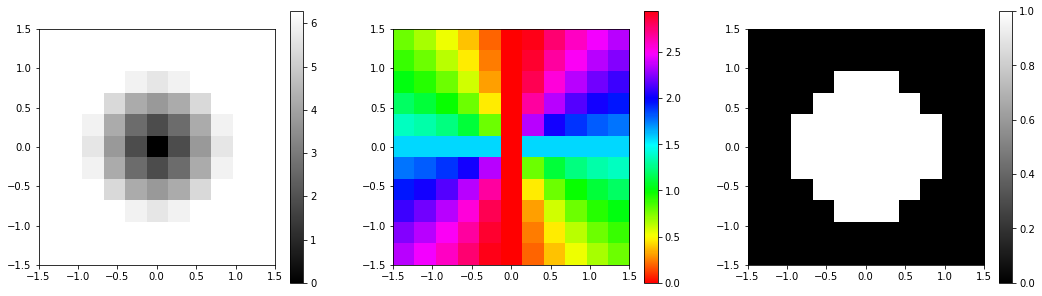

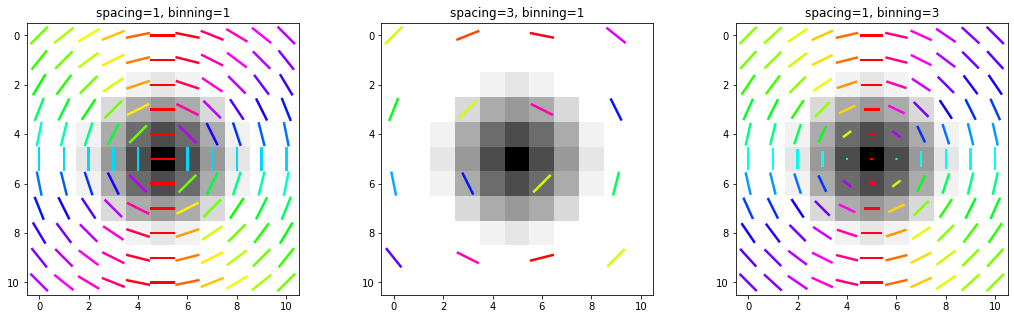

In [8]:
x = np.linspace(-1.5,1.5,11)
xx, yy = np.meshgrid(x,x)

xyextent=[-1.5,1.5,-1.5,1.5]

# retardance: increases from 0 to full-wave (2pi) over radius of 1, and then stays constant
retardance = 2*np.pi*np.sqrt(xx**2+yy**2)
retardance[retardance >2*np.pi] = 2*np.pi

# orientation rotates azimuthally.
orientation = np.arctan2(xx,yy)%np.pi

# transmission is assumed to be zero beyond radius 1.
transmission = np.sqrt(xx**2+yy**2)<=1
transmission = transmission.astype('float32')

fig2 = plt.figure(figsize=(18,5)) 
ax=plt.subplot(131)
plt.imshow(retardance,cmap='gray',extent=xyextent);
plt.colorbar(ax=ax);

ax=plt.subplot(132)
plt.imshow(orientation,cmap='hsv',extent=xyextent);
plt.colorbar(ax=ax);

ax=plt.subplot(133)
plt.imshow(transmission,cmap='gray',extent=xyextent);
plt.colorbar(ax=ax);

fig3 = plt.figure(figsize=(18,5)) 
ax=plt.subplot(131)
pltOrder.plotVectorField(retardance,orientation,spacing=1,window=1,colorOrient=True,linewidth=0.1,linelength=1);
plt.title('spacing=1, window=1')

ax=plt.subplot(132)
pltOrder.plotVectorField(retardance,orientation,spacing=3,window=1,colorOrient=True,linewidth=0.1,linelength=1);
plt.title('spacing=3, window=1')


ax=plt.subplot(133)
pltOrder.plotVectorField(retardance,orientation,spacing=1,window=3,colorOrient=True,linewidth=0.1,linelength=1);
plt.title('spacing=1, window=3')


## test 3: lines can be scaled and masked separately

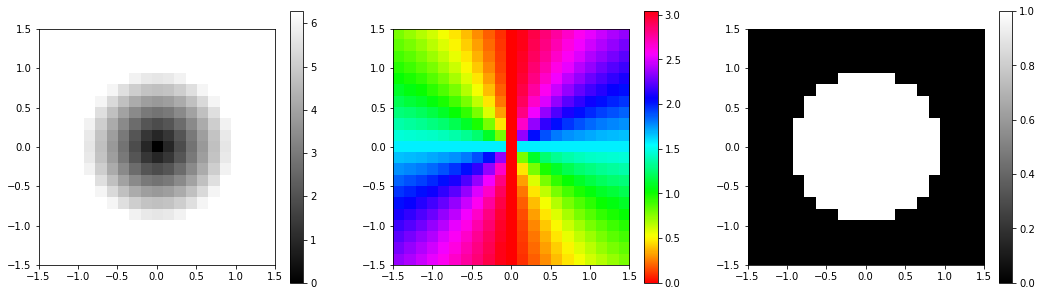

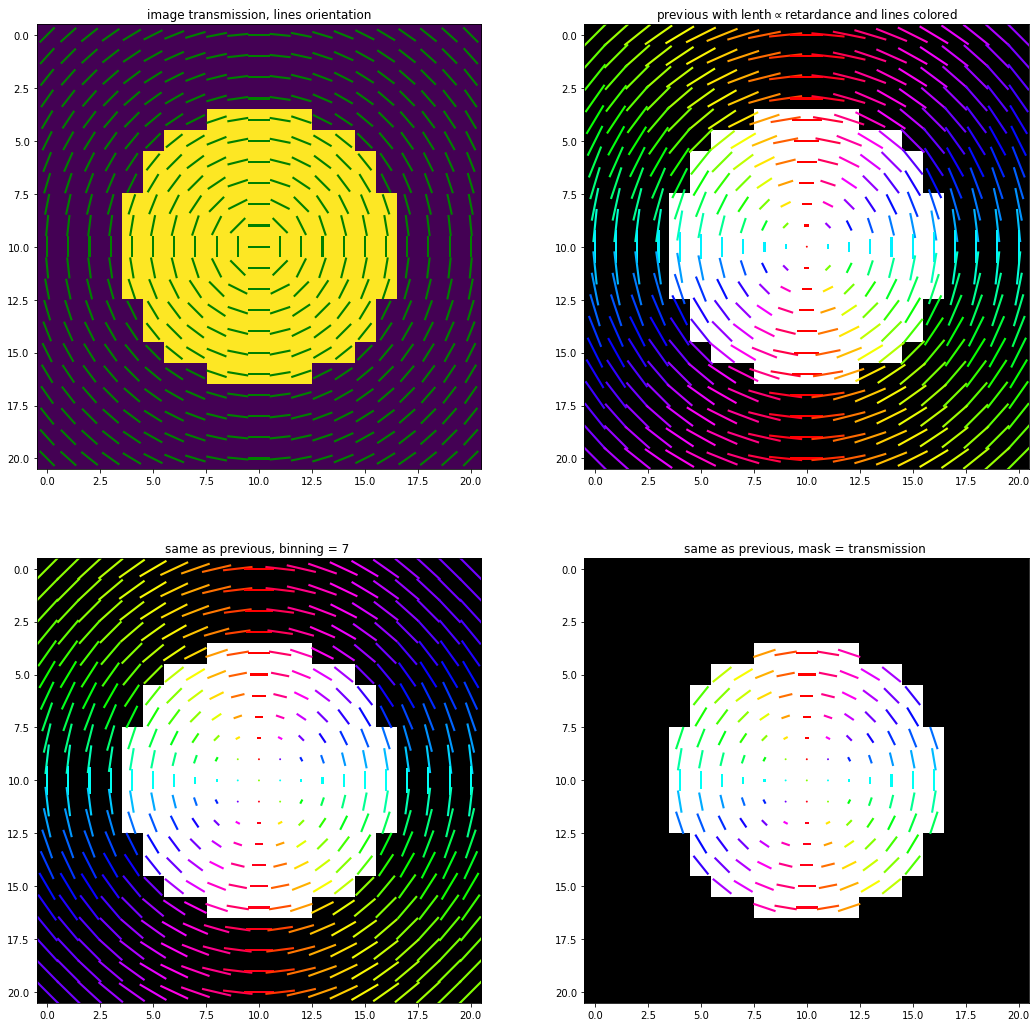

In [77]:
x = np.linspace(-1.5,1.5,21)
xx, yy = np.meshgrid(x,x)

xyextent=[-1.5,1.5,-1.5,1.5]

# retardance: increases from 0 to full-wave (2pi) over radius of 1, and then stays constant
retardance = 2*np.pi*np.sqrt(xx**2+yy**2)
retardance[retardance >2*np.pi] = 2*np.pi

# orientation rotates azimuthally.
orientation = np.arctan2(xx,yy)%np.pi

# transmission is assumed to be zero beyond radius 1.
transmission = np.sqrt(xx**2+yy**2)<=1
transmission = transmission.astype('float32')


fig2 = plt.figure(figsize=(18,5)) 
ax=plt.subplot(131)
plt.imshow(retardance,cmap='gray',extent=xyextent);
plt.colorbar(ax=ax);

ax=plt.subplot(132)
plt.imshow(orientation,cmap='hsv',extent=xyextent);
plt.colorbar(ax=ax);

ax=plt.subplot(133)
plt.imshow(transmission,cmap='gray',extent=xyextent);
plt.colorbar(ax=ax);

fig3 = plt.figure(figsize=(18,18)) 
ax=plt.subplot(221)
pltOrder.plotVectorField(transmission,orientation,spacing=1,window=1,colorOrient=False,linewidth=0.1,linelength=1, cmapImage='viridis');
plt.title('image transmission, lines orientation')

ax=plt.subplot(222)
pltOrder.plotVectorField(transmission,orientation,anisotropy=retardance,spacing=1,window=1,colorOrient=True,linewidth=0.1,linelength=0.5, cmapImage='gray');
plt.title('previous with lenth$\propto$retardance and lines colored')

ax=plt.subplot(223)
pltOrder.plotVectorField(transmission,orientation,anisotropy=retardance,spacing=1,window=7,colorOrient=True,linewidth=0.1,linelength=0.5, cmapImage='gray');
plt.title('same as previous, window = 7 ');

ax=plt.subplot(224)
pltOrder.plotVectorField(transmission,orientation,anisotropy=retardance,threshold = transmission.astype('bool'), \
                         spacing=1,window=7,colorOrient=True,linewidth=0.1,linelength=0.5, cmapImage='gray');
plt.title('same as previous, mask = transmission ');
